# Support Vector Machine

*You are seeing the
notebook output generated by
[Literate.jl](https://github.com/fredrikekre/Literate.jl) from the
[Julia source file](https://github.com/JuliaGaussianProcesses/KernelFunctions.jl/blob/master/examples/support-vector-machine/script.jl).
The rendered HTML can be viewed [in the docs](https://juliagaussianprocesses.github.io/KernelFunctions.jl/dev/examples/support-vector-machine/).*

In this notebook we show how you can use KernelFunctions.jl to generate
kernel matrices for classification with a support vector machine, as
implemented by LIBSVM.

In [1]:
using Distributions
using KernelFunctions
using LIBSVM
using LinearAlgebra
using Plots
using Random

# Set seed
Random.seed!(1234);

## Generate half-moon dataset

Number of samples per class:

In [2]:
nin = nout = 50;

We generate data based on SciKit-Learn's sklearn.datasets.make_moons function:

In [3]:
class1x = cos.(range(0, π; length=nout))
class1y = sin.(range(0, π; length=nout))
class2x = 1 .- cos.(range(0, π; length=nin))
class2y = 1 .- sin.(range(0, π; length=nin)) .- 0.5
X = hcat(vcat(class1x, class2x), vcat(class1y, class2y))
X .+= 0.1randn(size(X))
x_train = RowVecs(X)
y_train = vcat(fill(-1, nout), fill(1, nin));

Create a 100×100 2D grid for evaluation:

In [4]:
test_range = range(floor(Int, minimum(X)), ceil(Int, maximum(X)); length=100)
x_test = ColVecs(mapreduce(collect, hcat, Iterators.product(test_range, test_range)));

## SVM model

Create kernel function:

In [5]:
k = SqExponentialKernel() ∘ ScaleTransform(1.5)

Squared Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Scale Transform (s = 1.5)

[LIBSVM](https://github.com/JuliaML/LIBSVM.jl) can make use of a pre-computed kernel matrix.
KernelFunctions.jl can be used to produce that.

Precomputed matrix for training

In [6]:
model = svmtrain(kernelmatrix(k, x_train), y_train; kernel=LIBSVM.Kernel.Precomputed)

LIBSVM.SVM{Int64}(LIBSVM.SVC, LIBSVM.Kernel.Precomputed, nothing, 1, 2, [-1, 1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Vector{Int64}, Matrix{Int64}}(27, Int32[13, 14], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1 2 … 99 100], Int32[1, 2, 3, 4, 5, 6, 7, 20, 21, 26  …  55, 67, 68, 75, 76, 77, 83, 88, 99, 100], LIBSVM.SVMNode[LIBSVM.SVMNode(0, 1.0), LIBSVM.SVMNode(0, 2.0), LIBSVM.SVMNode(0, 3.0), LIBSVM.SVMNode(0, 4.0), LIBSVM.SVMNode(0, 5.0), LIBSVM.SVMNode(0, 6.0), LIBSVM.SVMNode(0, 7.0), LIBSVM.SVMNode(0, 20.0), LIBSVM.SVMNode(0, 21.0), LIBSVM.SVMNode(0, 26.0)  …  LIBSVM.SVMNode(0, 55.0), LIBSVM.SVMNode(0, 67.0), LIBSVM.SVMNode(0, 68.0), LIBSVM.SVMNode(0, 75.0), LIBSVM.SVMNode(0, 76.0), LIBSVM.SVMNode(0, 77.0), LIBSVM.SVMNode(0, 83.0), LIBSVM.SVMNode(0, 88.0), LIBSVM.SVMNode(0, 99.0), LIBSVM.SVMNode(0, 100.0)]), 0.0, [1.0; 1.0; … ; -0.518950084230163; -1.0;;], Float64[], Float64[], [-0.023457705156022746], 3, 0.01, 200.0, 0.001, 1.0, 0.

Precomputed matrix for prediction

In [7]:
y_pred, _ = svmpredict(model, kernelmatrix(k, x_train, x_test));

Visualize prediction on a grid:

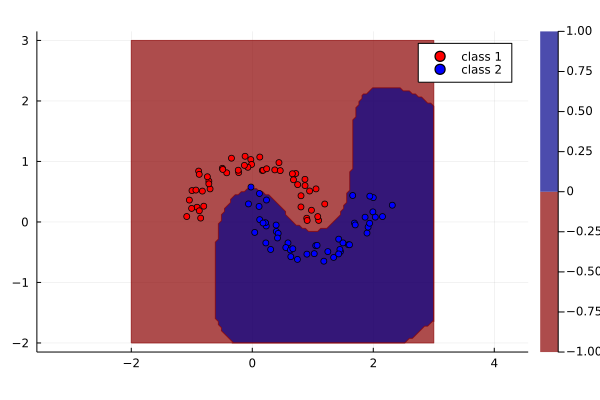

In [8]:
plot(; lim=extrema(test_range), aspect_ratio=1)
contourf!(test_range, test_range, y_pred; levels=1, color=cgrad(:redsblues), alpha=0.7)
scatter!(X[y_train .== -1, 1], X[y_train .== -1, 2]; color=:red, label="class 1")
scatter!(X[y_train .== +1, 1], X[y_train .== +1, 2]; color=:blue, label="class 2")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*